In [1]:
!pip install transformers torch sklearn


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\debon\AppData\Local\Temp\pip-install-651zch_7\sklearn_df8f443ab857483897d372f9b60e681c\setup.py", line 10, in <module>
          LONG_DESCRIPTION = f.read()
        File "C:\Users\debon\AppData\Local\Programs\Python\Python310\lib\encodings\cp1252.py", line 23, in decode
          return codecs.charmap_decode(input,self.errors,decoding_table)[0]
      UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note:

In [ ]:
import json
import numpy as np
from sklearn.base import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

data = []
with open('train.json', 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Preprocess the data
subjects, objects, relations = [], [], []
for item in data:
    for fact in item["passages"][0]["facts"]:
        subjects.append(fact["subjectText"])
        objects.append(fact["objectText"])
        relations.append(fact["propertyId"])
print(subjects[10])
print(objects[10])


# Vectorize using Bag of Words
vectorizer = CountVectorizer()
subject_vectors = vectorizer.fit_transform(subjects)
object_vectors = vectorizer.fit_transform(objects)


# Concatenate subject and object vectors
X = np.hstack((subject_vectors.toarray(), object_vectors.toarray()))
y = np.array(relations)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
print(X_test.shape)
print(X_test[100])
clf.fit(X_train, y_train)


Evaluation part

In [17]:
import pandas as pd
relations_df = pd.read_csv('data/relations.csv')
classes = relations_df['propertyName'].values
classes


array(['SUBSIDIARY_OF', 'NATIONALITY', 'PLACE_OF_RESIDENCE',
       'PLACE_OF_BIRTH', 'DATE_OF_DEATH', 'DATE_OF_BIRTH', 'FOUNDED_BY',
       'SPOUSE', 'EMPLOYEE_OR_MEMBER_OF', 'CHILD_OF', 'CEO',
       'POLITICAL_AFFILIATION', 'DATE_FOUNDED', 'HEADQUARTERS',
       'EDUCATED_AT'], dtype=object)

In [25]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns


def confusionMatrixAndAccuracyReport(Y_test, Y_pred, classes, title=''):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = metrics.accuracy_score(Y_test, Y_pred)

    classwiseAccuracy = cm.diagonal()/cm.sum(axis=1)

    f1_score = metrics.f1_score(Y_test, Y_pred, average='weighted')

    plt.figure(figsize=(15, 15))
    plt.title(
        f'{title} : Accuracy : {overallAccuracy*100:3.2f}% | F1 Score : {f1_score*100:3.2f}% ', size=14)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    cm = pd.DataFrame(cm, index=classes, columns=classes)
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues',
                fmt='g', xticklabels=classes, yticklabels=classes)

    plt.savefig(f'results/confusion_mat_{title}.png', bbox_inches='tight')
    plt.show()
    print(f'Accuracy: {overallAccuracy*100:3.3f}%')
    print(f'F1 Score: {f1_score*100:3.3f}%')
    classwiseAccuracy_df = pd.DataFrame(
        data=[classwiseAccuracy], columns=classes)
    print(
        f'\nClasswise Accuracy Score: \n{classwiseAccuracy_df.to_markdown(index=False)}')
    print('\nConfusion Matrix:')
    print(cm.to_markdown())
    return overallAccuracy


Predicted class => 11
accuracy_score :: 0.584
f1_score ::0.600
              precision    recall  f1-score   support

           1       0.94      0.49      0.65        67
          10       0.92      0.80      0.86        85
          11       0.26      0.83      0.40       139
          12       0.75      0.46      0.57       132
          14       0.70      0.51      0.59        63
          15       0.86      0.76      0.80        90
           2       0.47      0.27      0.34        81
          25       0.68      0.44      0.53       125
           3       0.79      0.51      0.62       181
          34       0.59      0.46      0.52       102
           4       0.53      0.48      0.50        71
          45       0.91      0.76      0.83        51
           5       0.72      0.37      0.49        71
           6       0.60      0.75      0.66       102
           9       0.73      0.81      0.77       109

    accuracy                           0.58      1469
   macro avg     

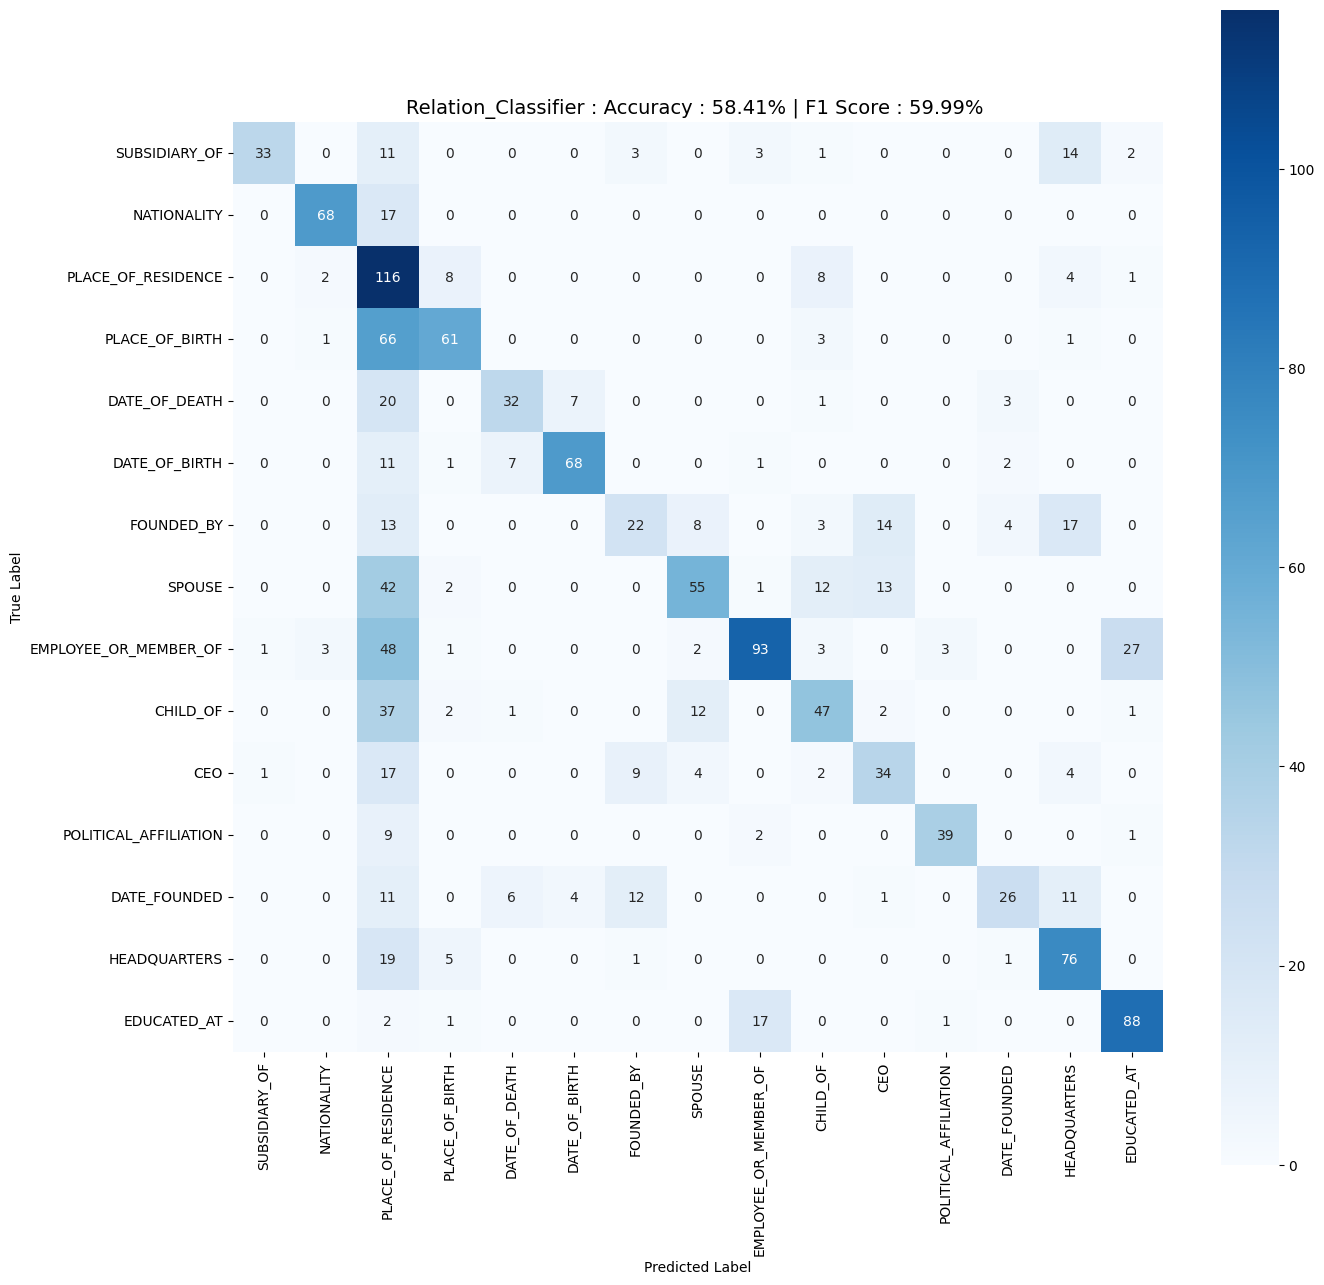

Accuracy: 58.407%
F1 Score: 59.985%

Classwise Accuracy Score: 
|   SUBSIDIARY_OF |   NATIONALITY |   PLACE_OF_RESIDENCE |   PLACE_OF_BIRTH |   DATE_OF_DEATH |   DATE_OF_BIRTH |   FOUNDED_BY |   SPOUSE |   EMPLOYEE_OR_MEMBER_OF |   CHILD_OF |      CEO |   POLITICAL_AFFILIATION |   DATE_FOUNDED |   HEADQUARTERS |   EDUCATED_AT |
|----------------:|--------------:|---------------------:|-----------------:|----------------:|----------------:|-------------:|---------:|------------------------:|-----------:|---------:|------------------------:|---------------:|---------------:|--------------:|
|        0.492537 |           0.8 |             0.834532 |         0.462121 |        0.507937 |        0.755556 |     0.271605 |     0.44 |                0.513812 |   0.460784 | 0.478873 |                0.764706 |       0.366197 |       0.745098 |      0.807339 |

Confusion Matrix:
| True Label            |   SUBSIDIARY_OF |   NATIONALITY |   PLACE_OF_RESIDENCE |   PLACE_OF_BIRTH |   DATE_OF_DEATH |

0.584070796460177

In [26]:

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(f'Predicted class => {y_pred[10]}')
print(f'accuracy_score :: {metrics.accuracy_score(y_test, y_pred):0.3f}')
print(f'f1_score ::{metrics.f1_score(y_test, y_pred,average="weighted"):0.3f}')
print(metrics.classification_report(y_test, y_pred))
confusionMatrixAndAccuracyReport(
    y_test, y_pred, classes, title='Relation_Classifier')
